# Label distribution plotting
Visualising what the model has predicted given a raw dataset.

In [1]:
import os

notebook_mode: int = int(
    input(
        """
    Select notebook mode: 
    1. Google Colab  2. Local
    """
    )
)

if notebook_mode == 1:
    # Run on Colab.
    INPUT_PATH: str = "/content/drive/MyDrive/Ellinbank/video_observation/data/"
    SCRIPT_PATH: str = "/content/drive/MyDrive/Ellinbank/video_observation/training_testing/data_labelling/"
    OUTPUT_PATH: str = "/content/drive/MyDrive/Ellinbank/video_observation/output/"
    os.system(command="cp {}custom_model.py .".format(SCRIPT_PATH))
    os.system(command="cp {}inference.py .".format(SCRIPT_PATH))
    os.system(command="cp {}utils.py .".format(SCRIPT_PATH))
    os.system(command="cp {}operation.py .".format(SCRIPT_PATH))
elif notebook_mode == 2:
    INPUT_PATH: str = "../../../../data/"
    SCRIPT_PATH: str = "./"
    OUTPUT_PATH: str = "./out/"

In [2]:
files: list[str] = os.listdir(path=INPUT_PATH)
files = [f for f in files if f.endswith(".txt")]
print(files)

['MOS2E03230475.txt', 'MOS2E03230488.txt', 'MOS2E03230532.txt', 'MOS2E03230539.txt', 'MOS2E03230553.txt']


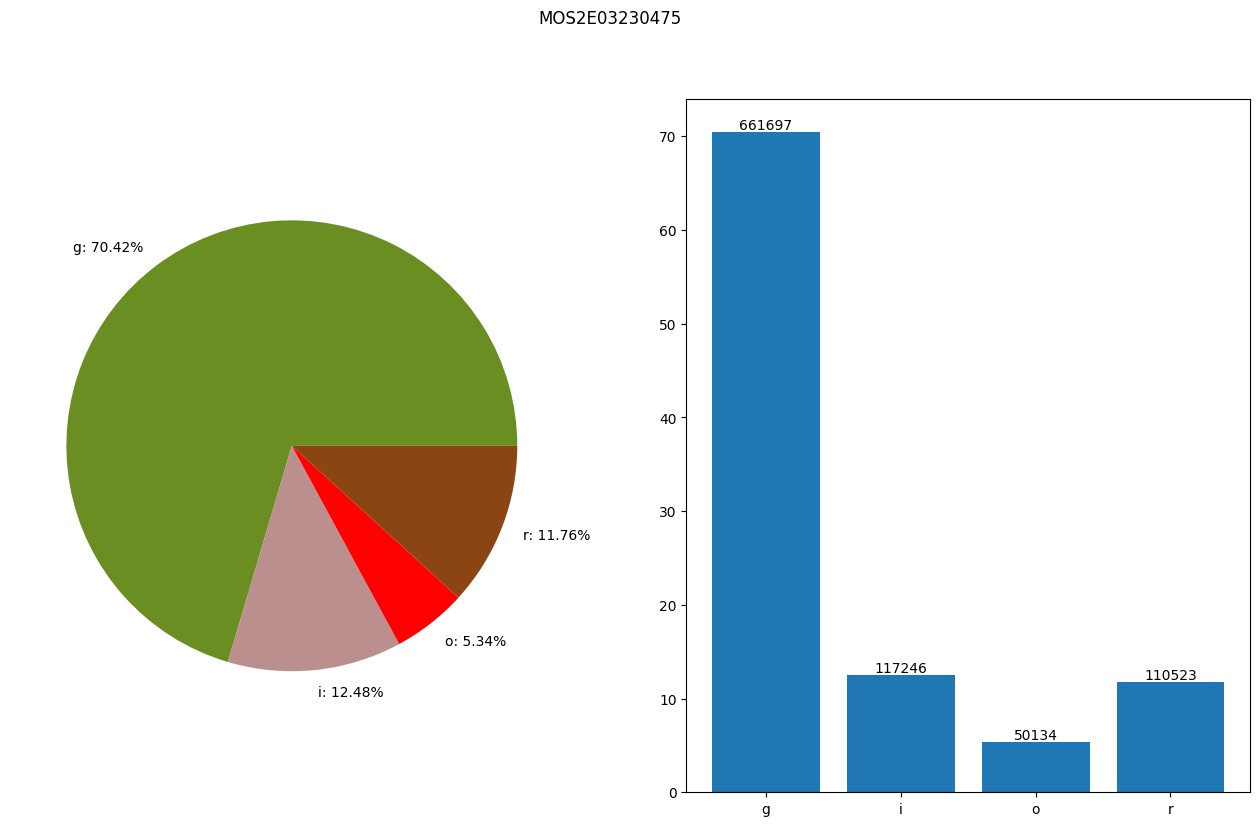

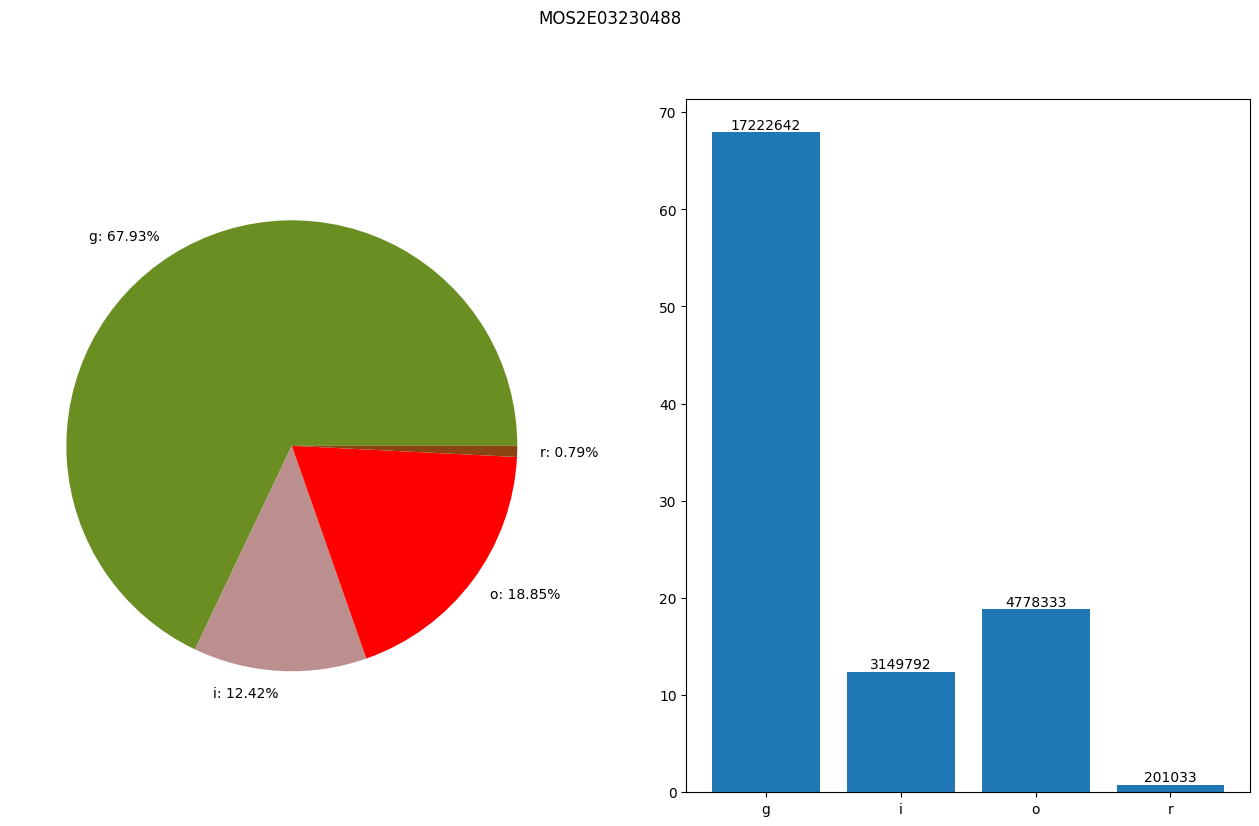

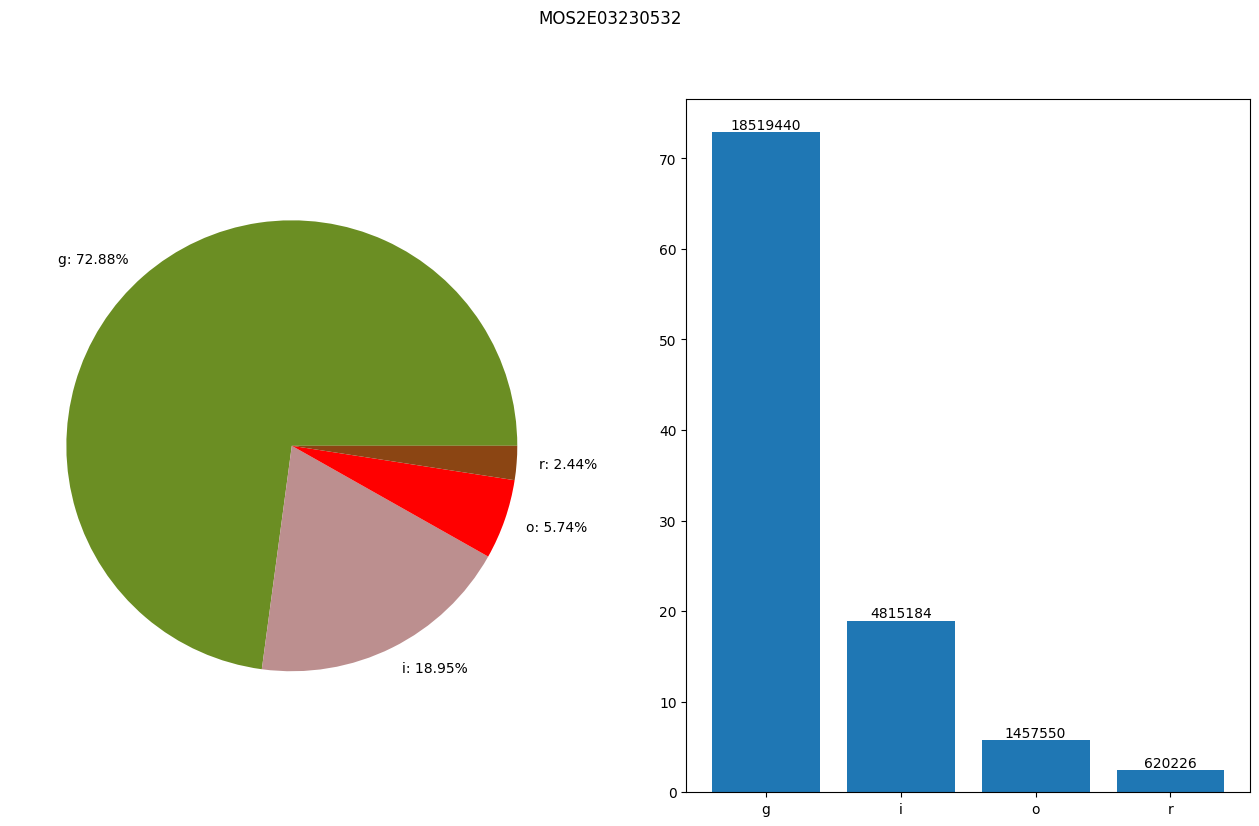

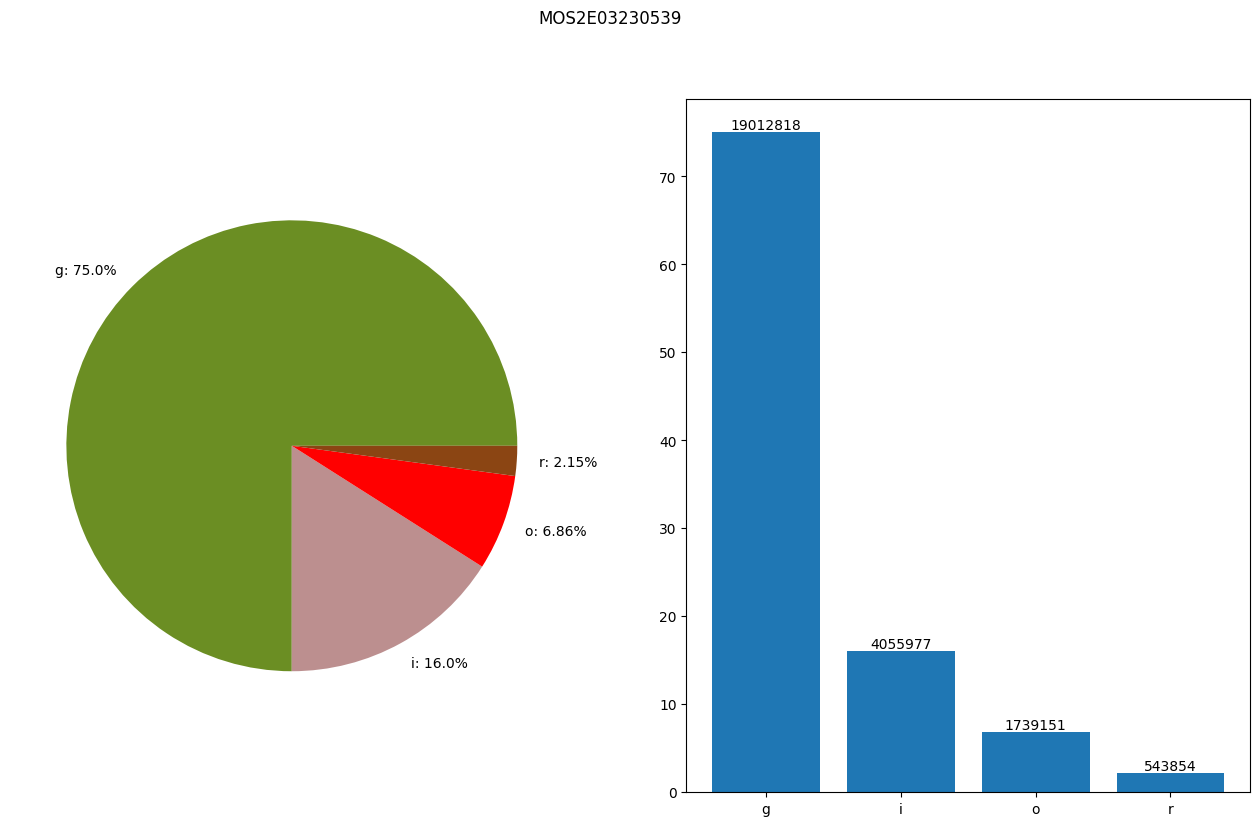

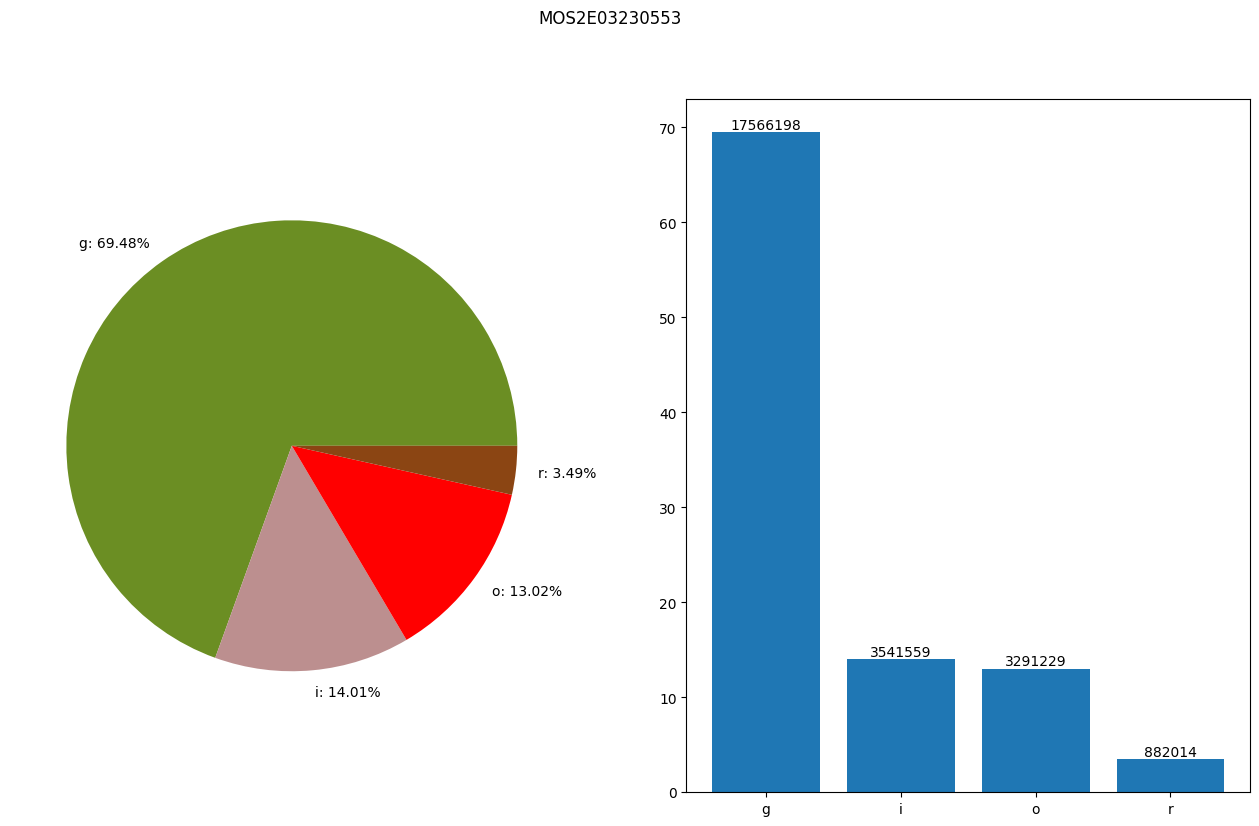

In [3]:
import numpy as np
from utils import calculate_distributions, plot_distributions

for f_name in files:
    predictions: np.ndarray = np.loadtxt(
        fname="{}{}".format(INPUT_PATH, f_name),
        dtype=str,
    )
    pred_details: tuple[np.ndarray] = calculate_distributions(predictions=predictions)

    labels: np.ndarray = pred_details[0]
    counts: np.ndarray = pred_details[1]
    percentages: np.ndarray = pred_details[2]

    plot_distributions(
        labels=labels,
        counts=counts,
        percentages=percentages,
        plot_title=f_name.split(".")[0],
    )